# <span style="color:turquoise">D208 Performance Assessment NBM2 Task 2</span>
## <span style="color:turquoise">Logistic Regression for Predictive Modeling</span>
&emsp;Ryan L. Buchanan
<br>&emsp;Student ID:  001826691
<br>&emsp;Masters Data Analytics (12/01/2020)
<br>&emsp;Program Mentor:  Dan Estes
<br>&emsp;(385) 432-9281 (MST)
<br>&emsp;rbuch49@wgu.edu
</span>

### <span style="color:green"><b>A1. Research Question</b>:</span>
Can we determine which individual customers are at high risk of churn?  And, can we determine which features are most significant to churn?

### <span style="color:green"><b>A2. Objectives & Goals</b>:</span>
Stakeholders in the company will benefit by knowing, with some measure of confidence, which customers are likely to churn soon because this will provide weight for decisions in marketing improved services to customers with these characteristics and past user experiences.

### <span style="color:green"><b>B1. Summary of Assumptions</b>:</span>
Assumptions of a logistic regression model include:
* It is based on the Bernoulli distribution rather than Gaussian because the dependent variable is binary (to churn or not to churn).
* The predicted values are restricted to a range of nomial values: "Yes" or "No."
* It predicts the <i>probability</i> of particular outcomes rather than the outcome itself.
* It is a logarithm of the odds of achieving 1.

### <span style="color:green"><b>B2. Tool Benefits</b>:</span>
Python & IPython Jupyter notebooks will be used to support this analysis.  Python offers very intuitive, simple & versatile programming style & syntax, as well as a large system of mature packages for data science & machine learning.  Since, Python is cross-platform, it will work well whether consumers of the analysis are using Windows PCs or a MacBook laptop.  It is fast when compared with other possible programming languages like R or MATLAB (Massaron, p. 8).
<br> &emsp; Also, there is strong support for Python as the most popular data science programming language in popular literature & media (<a target="_blank" href="https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python">CBTNuggets</a>)

### <span style="color:green"><b>B3. Appropriate Technique</b>:</span>
Logistic regression is an appropriate technique to analyze the research question because or dependent variable is binomial, "Yes" or "No."  We want to find out what the likelihood of customer churn is for individual customers, based on a list of independent variables (area type, job, children, age, income, etc.).  It will improve our understanding of increaed probability of churn as we include or remove different independent variables & find out whether or not they have a positive or negative relationship to our target variable.

### <span style="color:green"><b>C1. Data Goals</b>:</span>

My approach will include:
<br>&ensp; 1. Back up my data and the process I am following as a copy to my machine and, since this is a manageable dataset, to GitHub using command line and gitbash.
<br>&ensp; 2. Read the data set into Python using Pandas' read_csv command.
<br>&ensp; 3. Evaluate the data struture to better understand input data.
<br>&ensp; 4. Naming the dataset as a the variable "churn_df" and subsequent useful slices of the dataframe as "df".
<br>&ensp; 5. Examine potential misspellings, awkward variable naming & missing data.
<br>&ensp; 6. Find outliers that may create or hide statistical significance using histograms.
<br>&ensp; 7. Imputing records missing data with meaningful measures of central tendency (mean, median or mode) or simply remove outliers that are several standard deviations above the mean.

Most relevant to our decision making process is the <b>dependent variable</b> of "Churn" which is binary categorical with only two values, "Yes" or "No".  "Churn" will be our <b>categorical target variable</b>. 

<br>In cleaning the data, we may discover relevance of the <b>continuous predictor variables</b>: 
* Children
* Income
* Outage_sec_perweek
* Email
* Contacts    
* Yearly_equip_failure
* Tenure (the number of months the customer has stayed with the provider)
* MonthlyCharge
* Bandwidth_GB_Year    
    
<br>Likewise, we may discover relevance of the <b>categorical predictor variables</b> (all binary categorical with only two values, "Yes" or "No", except where noted): 
* Churn: Whether the customer discontinued service within the last month (yes, no)
* Techie: Whether the customer considers themselves technically inclined (based on
customer questionnaire when they signed up for services) (yes, no)
* Contract: The contract term of the customer (month-to-month, one year, two year)
* Port_modem: Whether the customer has a portable modem (yes, no)
* Tablet: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)
* InternetService: Customer’s internet service provider (DSL, fiber optic, None)
* Phone: Whether the customer has a phone service (yes, no)
* Multiple: Whether the customer has multiple lines (yes, no)
* OnlineSecurity: Whether the customer has an online security add-on (yes, no)
* OnlineBackup: Whether the customer has an online backup add-on (yes, no)
* DeviceProtection: Whether the customer has device protection add-on (yes, no)
* TechSupport: Whether the customer has a technical support add-on (yes, no)
* StreamingTV: Whether the customer has streaming TV (yes, no)
* StreamingMovies: Whether the customer has streaming movies (yes, no)
    
<br>Finally, <b>discrete ordinal predictor variables</b> from the survey responses from customers regarding various customer service features may be relevant in the decision-making process. In the surveys, customers provided ordinal numerical data by rating 8 customer service factors on a scale of 1 to 8 (1 = most important, 8 = least important): 
    
* Item1: Timely response
* Item2: Timely fixes
* Item3: Timely replacements
* Item4: Reliability
* Item5: Options
* Item6: Respectful response
* Item7: Courteous exchange
* Item8: Evidence of active listening


### <span style="color:green"><b>C2. Summary Statistics</b>:</span>
Summary statistics analysed & discussed below, including the target variable and all predictor variables needed to gather from the dataset to answer the research question.

### <span style="color:green"><b>C3. Steps to Prepare Data</b>:</span>

* Import dataset to Python dataframe.
* Rename columns/variables of survey to easily recognizable features (ex: "Item1" to "TimelyResponse").
* Get a description of dataframe, structure (columns & rows) & data types.
* View summary statistics.
* Drop less meaningful identifying (ex: "Customer_id") & demographic columns (ex: zip code) from dataframe.
* Check for records with missing data & impute missing data with meaningful measures of central tendency (mean, median or mode) or simply remove outliers that are several standard deviations above the mean.
* Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
* View univariate & bivariate visualizations.
* Place "Churn" at end of dataframe
* Finally, the prepared dataset will be extracted & provided as "churn_prepared_log.csv"

In [1]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Change color of Matplotlib font
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [4]:
# Load data set into Pandas dataframe
churn_df = pd.read_csv('Data/churn_clean.csv')

# Rename last 8 survey columns for better description of variables
churn_df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

In [5]:
# Display Churn dataframe
churn_df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [6]:
# List of Dataframe Columns
df = churn_df.columns
print(df)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')


In [7]:
# Find number of records and columns of dataset
churn_df.shape

(10000, 50)

In [8]:
# Describe Churn dataset statistics
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
# Remove less meaningful demographic variables from statistics description
churn_df = churn_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
                            'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
# Discover missing data points within dataset
data_nulls = churn_df.isnull().sum()
print(data_nulls)

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respectfulness          0
Courteous               0
Listening               0
dtype: int64


### Dummy variable data preparation
<span style="color:red">Turn all yes/no into dummy variables a la Performance Lab Python</span>.

In [11]:
churn_df['DummyGender'] = [1 if v == 'Male' else 0 for v in churn_df['Gender']]
churn_df['DummyChurn'] = [1 if v == 'Male' else 0 for v in churn_df['Churn']]
churn_df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in churn_df['Techie']]
churn_df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in churn_df['Contract']]
churn_df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in churn_df['Port_modem']]
churn_df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in churn_df['Tablet']]
churn_df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in churn_df['InternetService']]
churn_df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in churn_df['Phone']]
churn_df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in churn_df['Multiple']]
churn_df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineSecurity']]
churn_df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineBackup']]
churn_df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in churn_df['DeviceProtection']]
churn_df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in churn_df['TechSupport']]
churn_df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingTV']]
churn_df['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingMovies']]
churn_df['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in churn_df['PaperlessBilling']]

In [12]:
# Drop original categorical features from dataframe
churn_df = churn_df.drop(columns=['Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                                  'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.299100,0.440800,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.457887,0.496508,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df = churn_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyChurn',
       'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling'],
      dtype='object')


In [14]:
# Move DummyChurn to end of dataset as target
churn_df = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 
        'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening',
       'DummyGender', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling', 'DummyChurn']]

In [15]:
df = churn_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyGender',
       'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling',
       'DummyChurn'],
      dtype='object')


### <span style="color:green"><b>C4. Visualizations</b>:</span>
Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


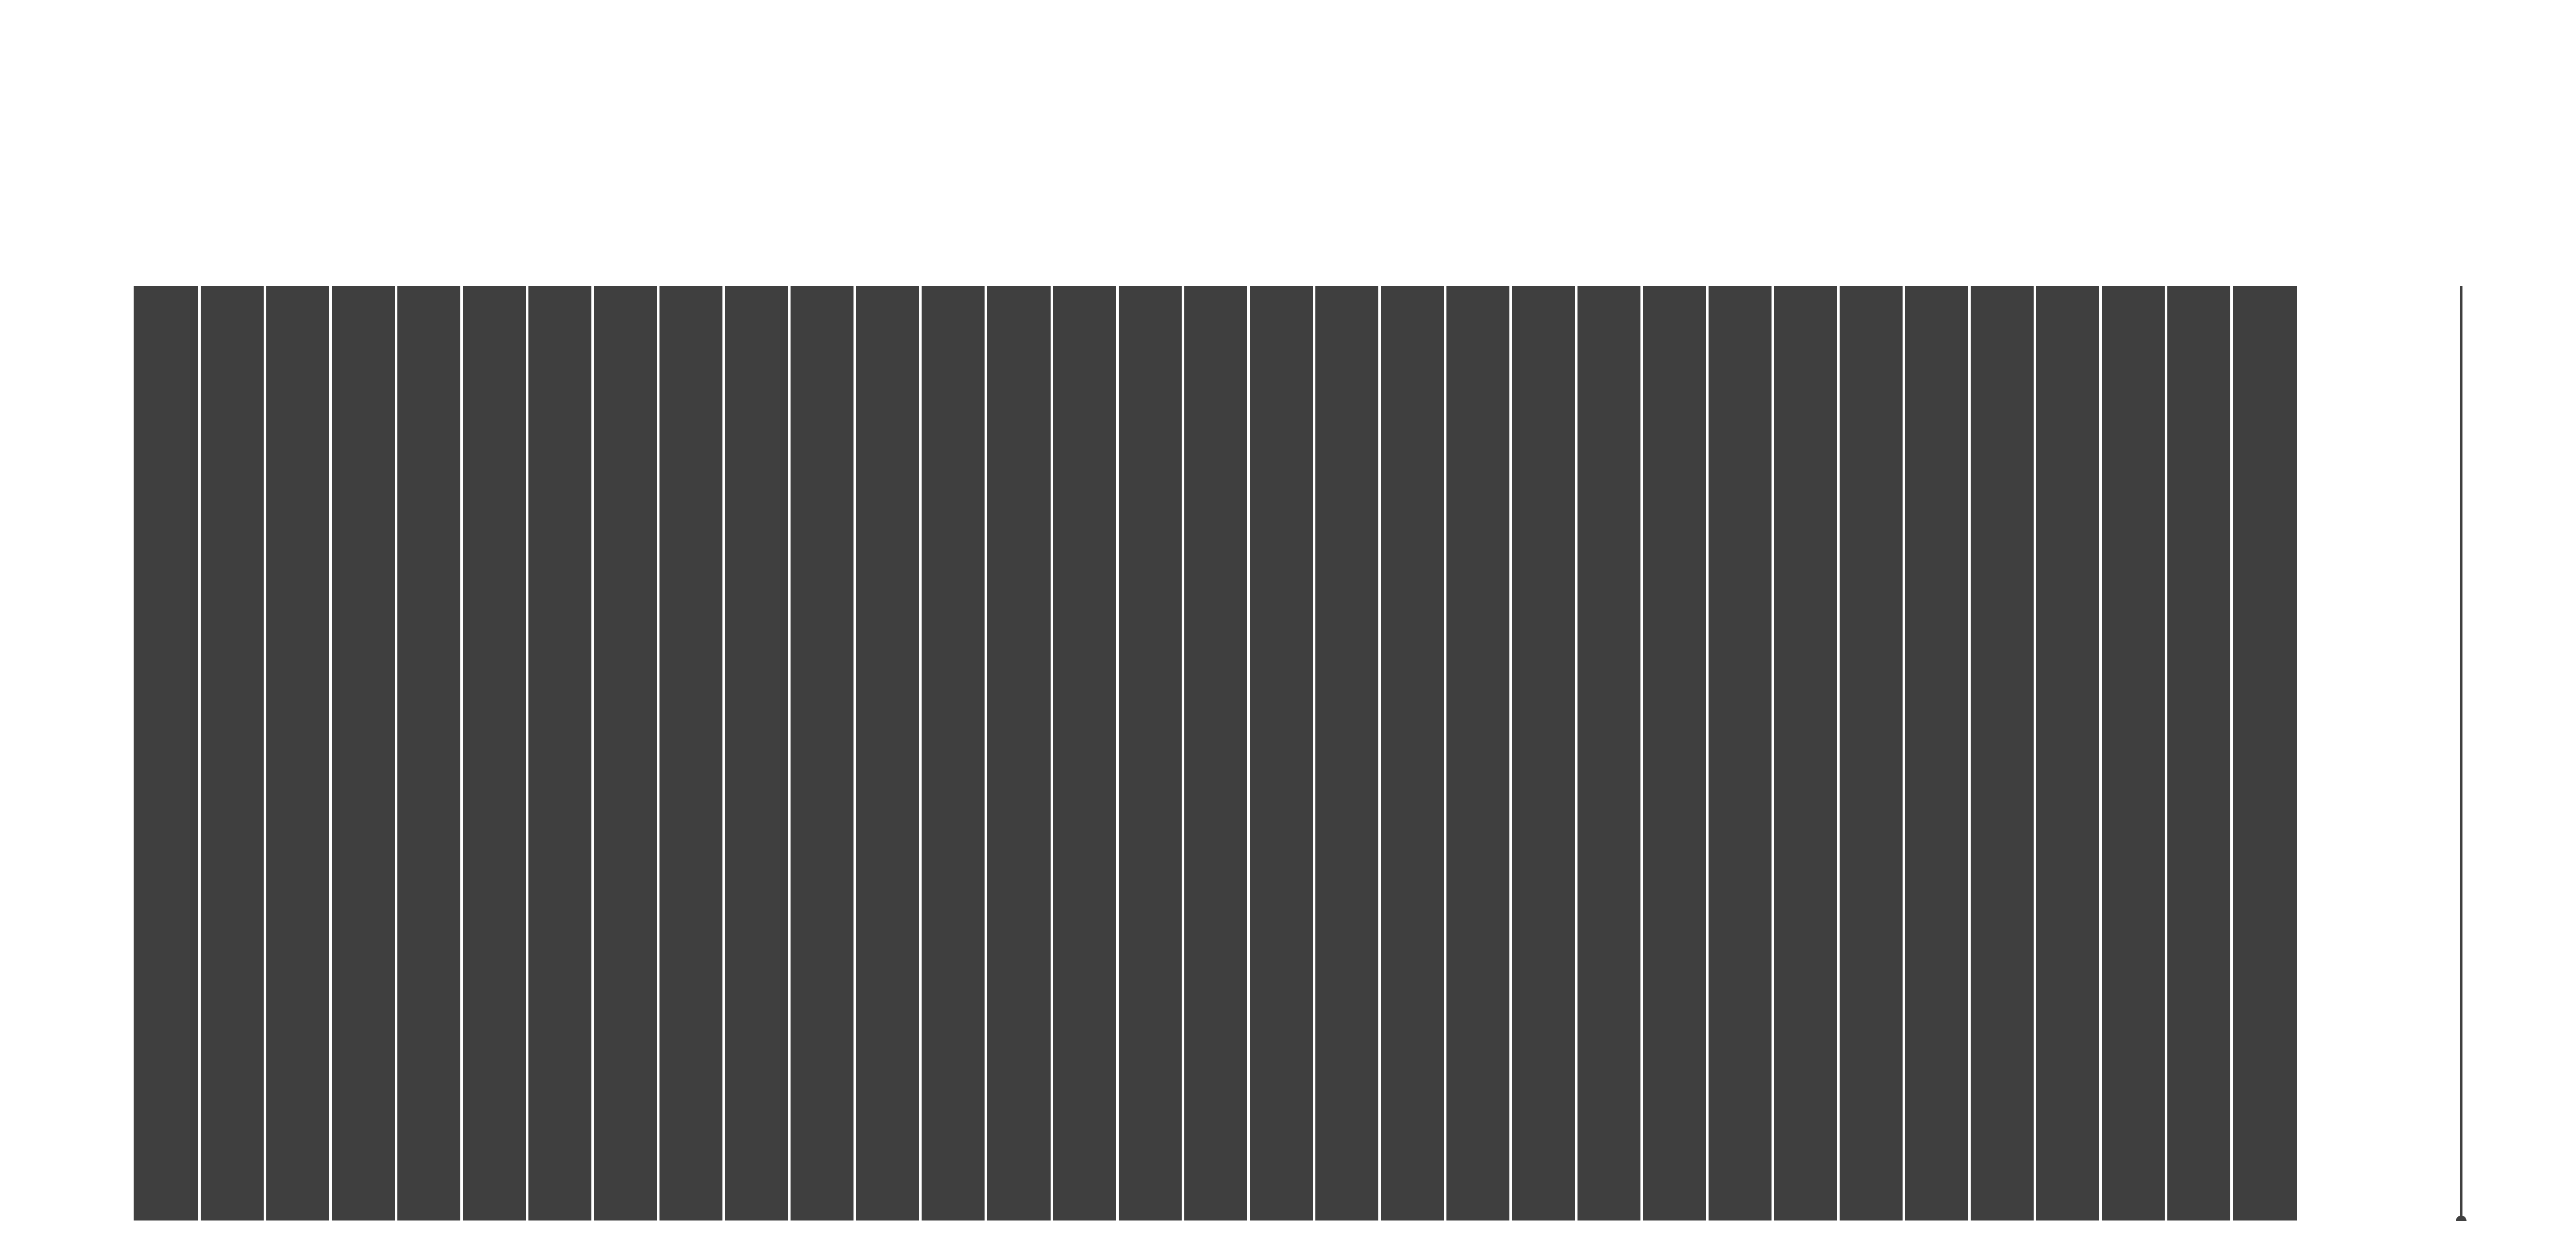

In [16]:
# Visualize missing values in dataset

# Install appropriate library
!pip install missingno

# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(churn_df);

In [17]:
'''No need to impute an missing values as the dataset appears complete/cleaned'''
# Impute missing fields for variables Children, Age, Income, Tenure and Bandwidth_GB_Year with median or mean
# churn_df['Children'] = churn_df['Children'].fillna(churn_df['Children'].median())
# churn_df['Age'] = churn_df['Age'].fillna(churn_df['Age'].median())
# churn_df['Income'] = churn_df['Income'].fillna(churn_df['Income'].median())
# churn_df['Tenure'] = churn_df['Tenure'].fillna(churn_df['Tenure'].median())
# churn_df['Bandwidth_GB_Year'] = churn_df['Bandwidth_GB_Year'].fillna(churn_df['Bandwidth_GB_Year'].median())

'No need to impute an missing values as the dataset appears complete/cleaned'

## Univariate Statistics

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


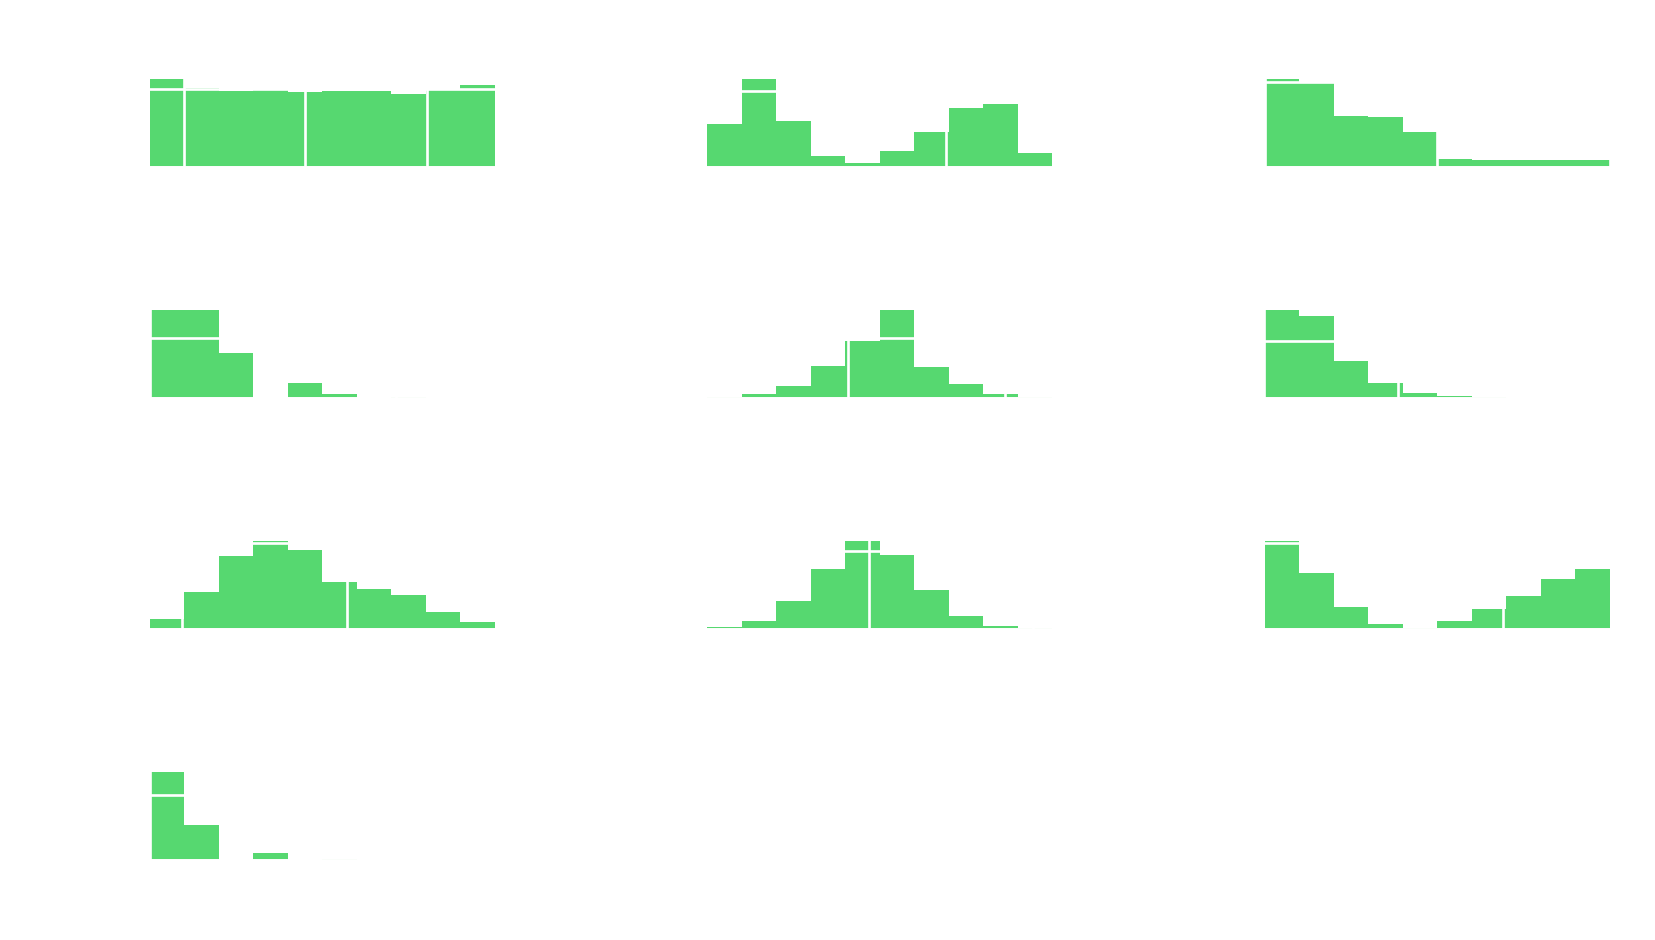

In [18]:
# Create histograms of contiuous variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

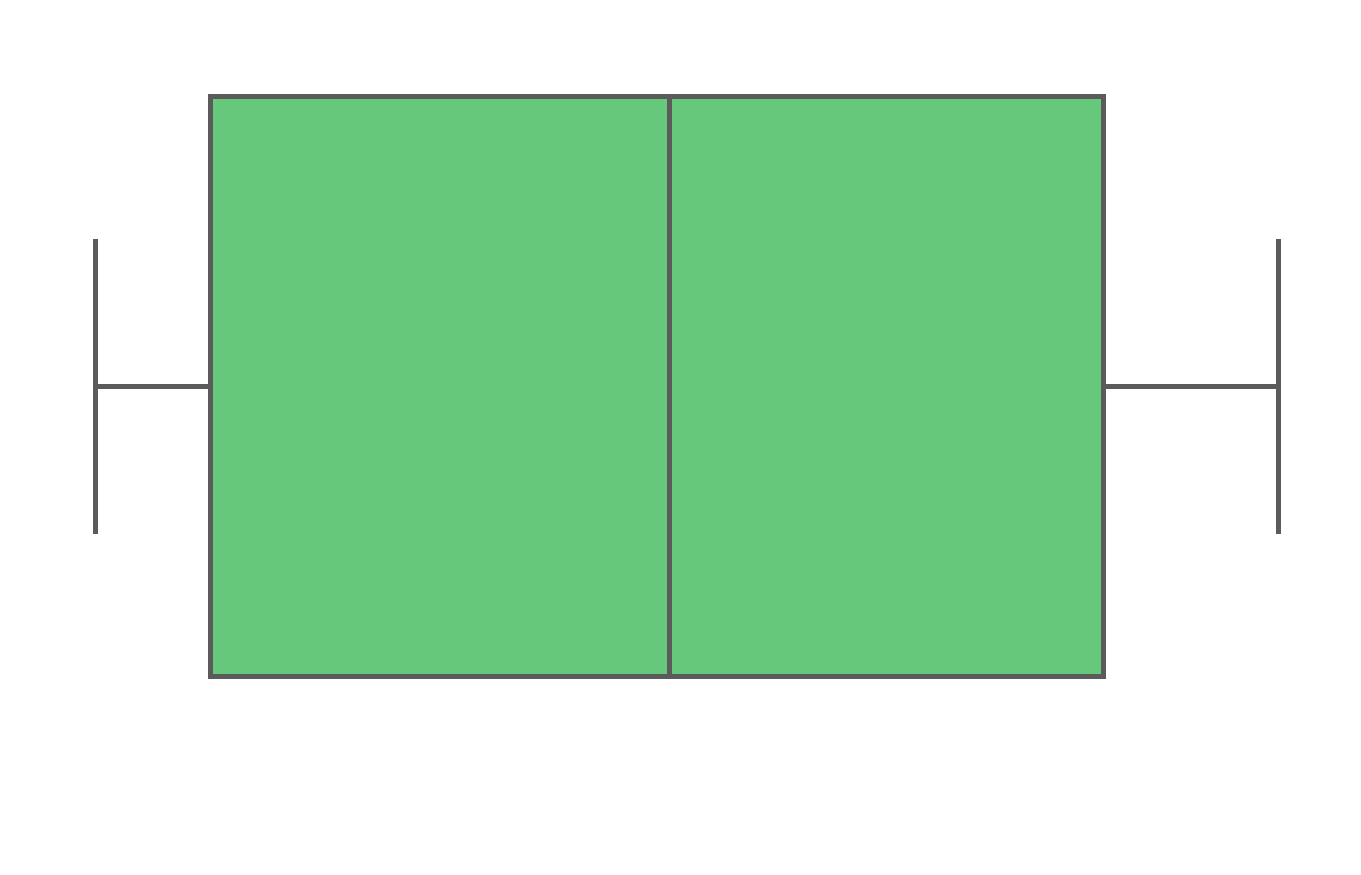

In [19]:
# Create Seaborn boxplots for continuous variables
sns.boxplot('Tenure', data = churn_df)
plt.show()

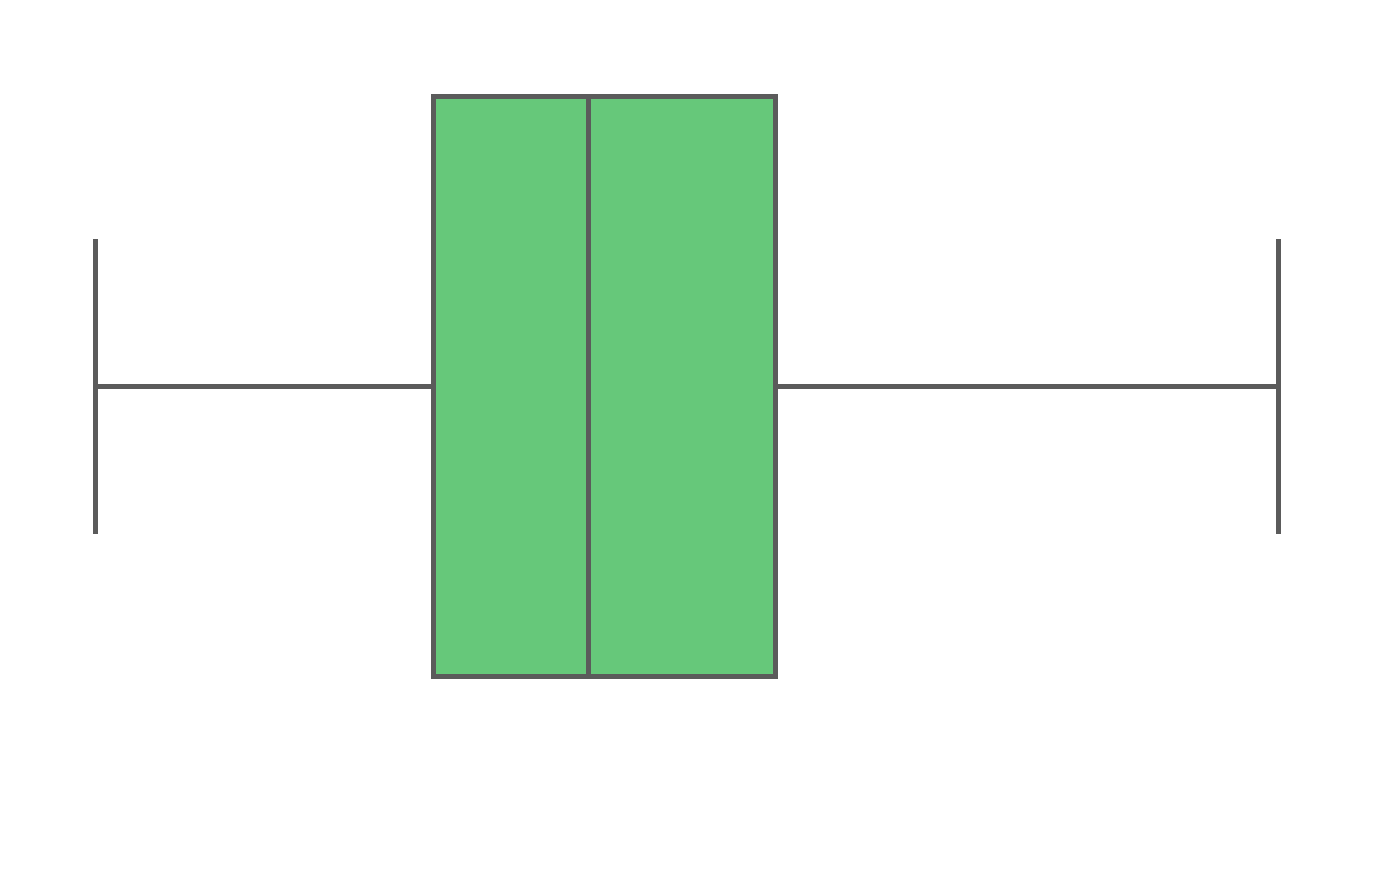

In [20]:
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

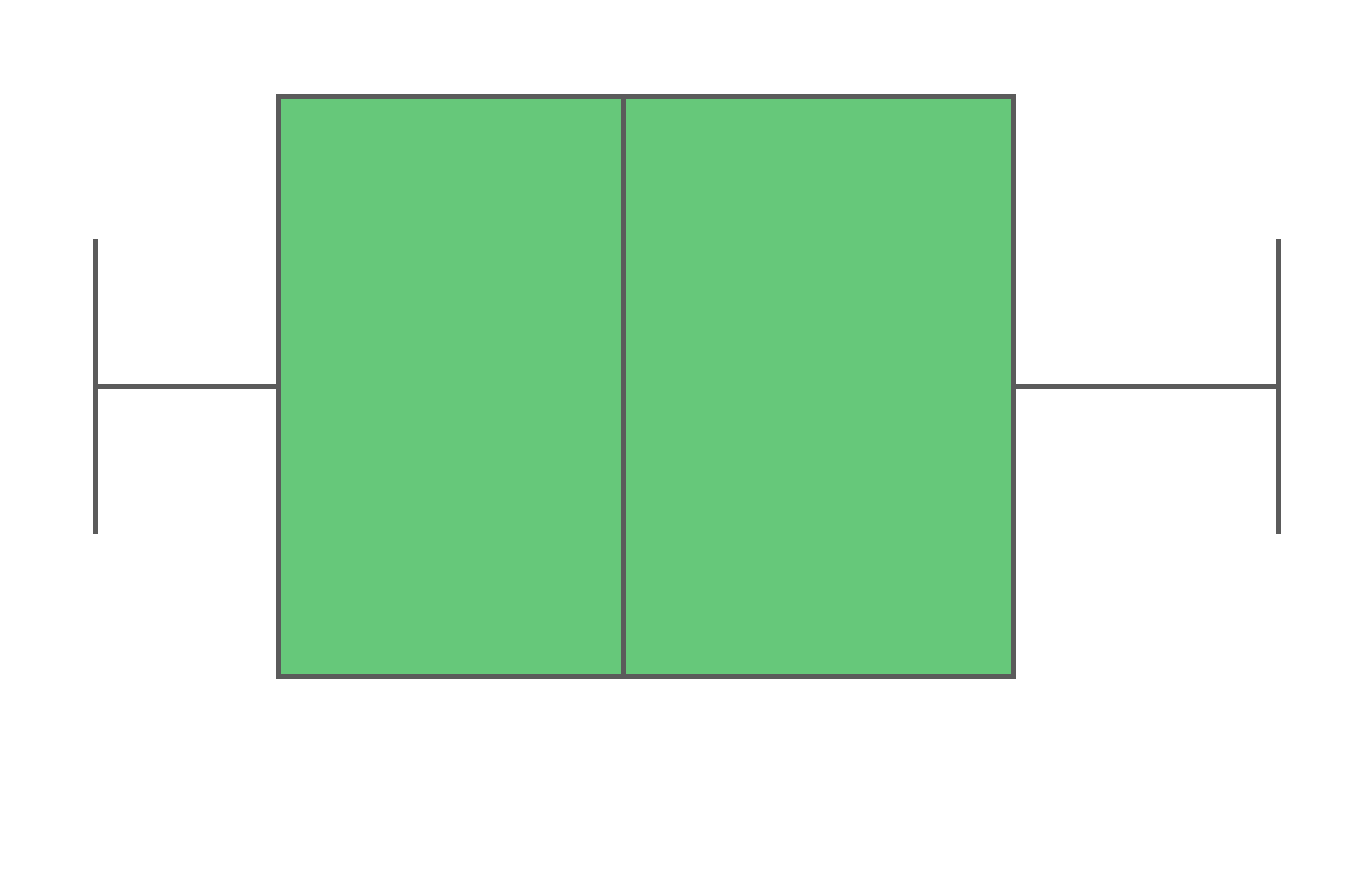

In [21]:
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

### It appears that anomolies have been removed from the dataset present "churn_clean.csv" as there are no remaining outliers.

## Bivariate Statistics

### Let's run some scatterplots to get an idea of our linear relationships with our target variable of "Bandwidth_GB_Year" usage & some of the respective predictor variables.

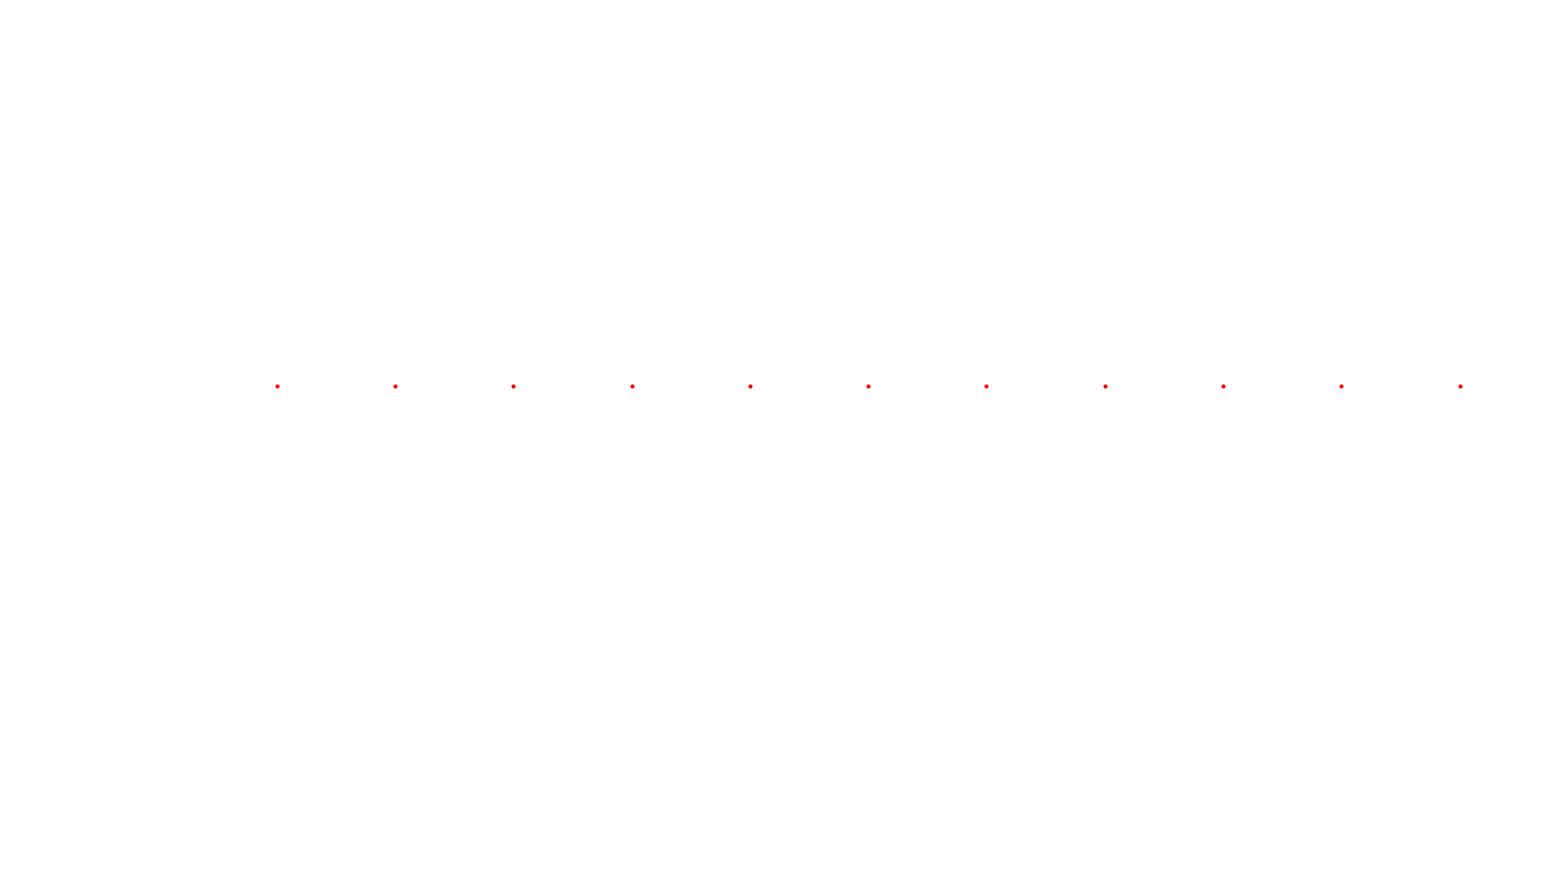

In [23]:
# Run scatterplots to show direct or inverse relationships between target & independent variables
sns.scatterplot(x=churn_df['Children'], y=churn_df['DummyChurn'], color='red')
plt.show();

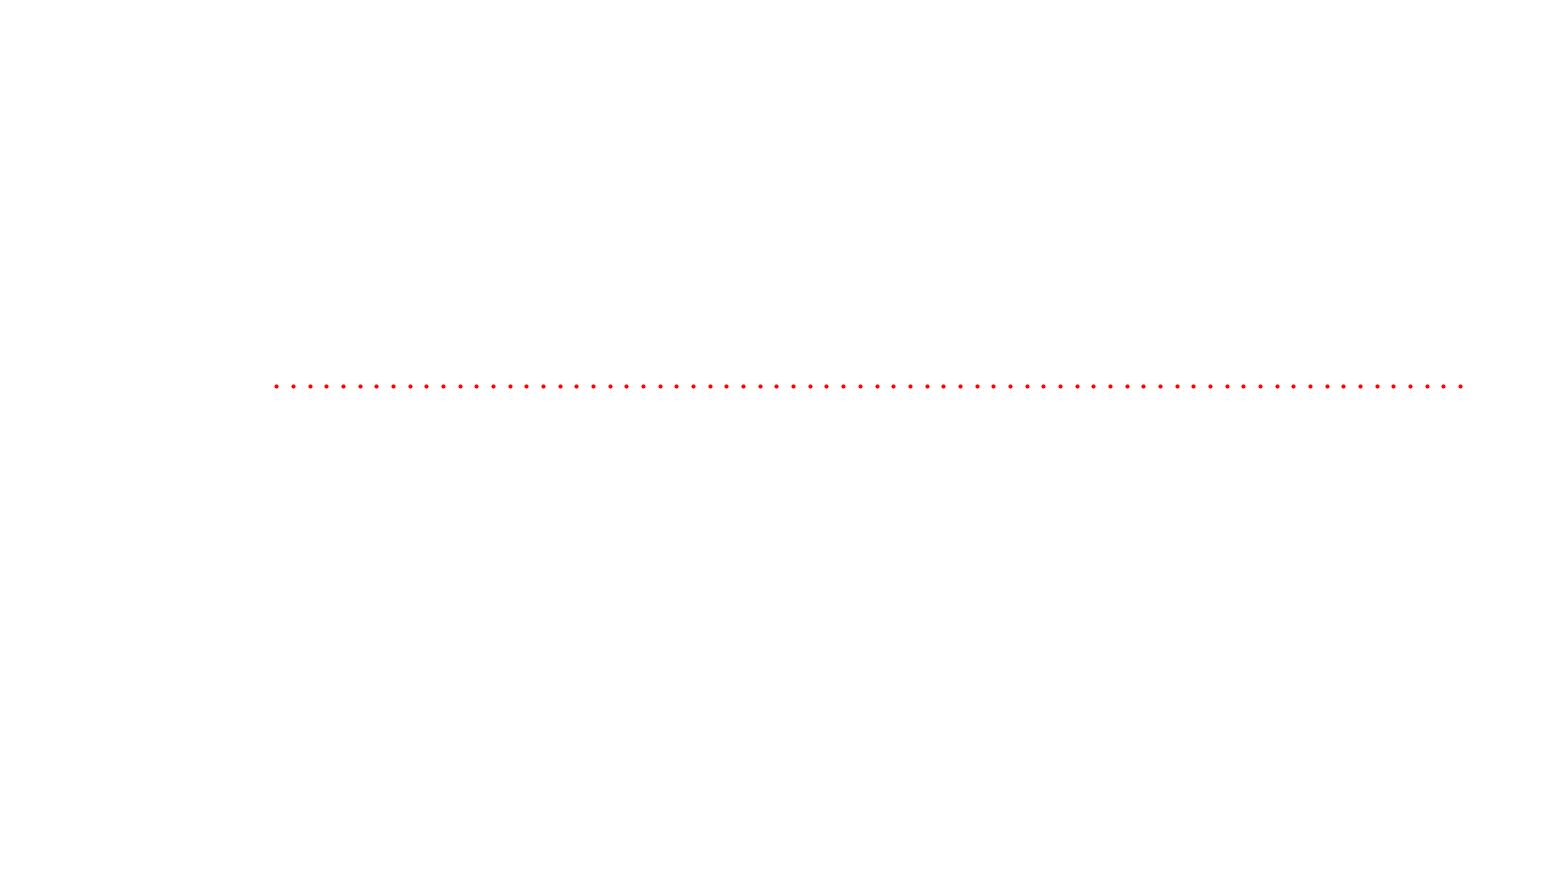

In [24]:
sns.scatterplot(x=churn_df['Age'], y=churn_df['DummyChurn'], color='red')
plt.show();

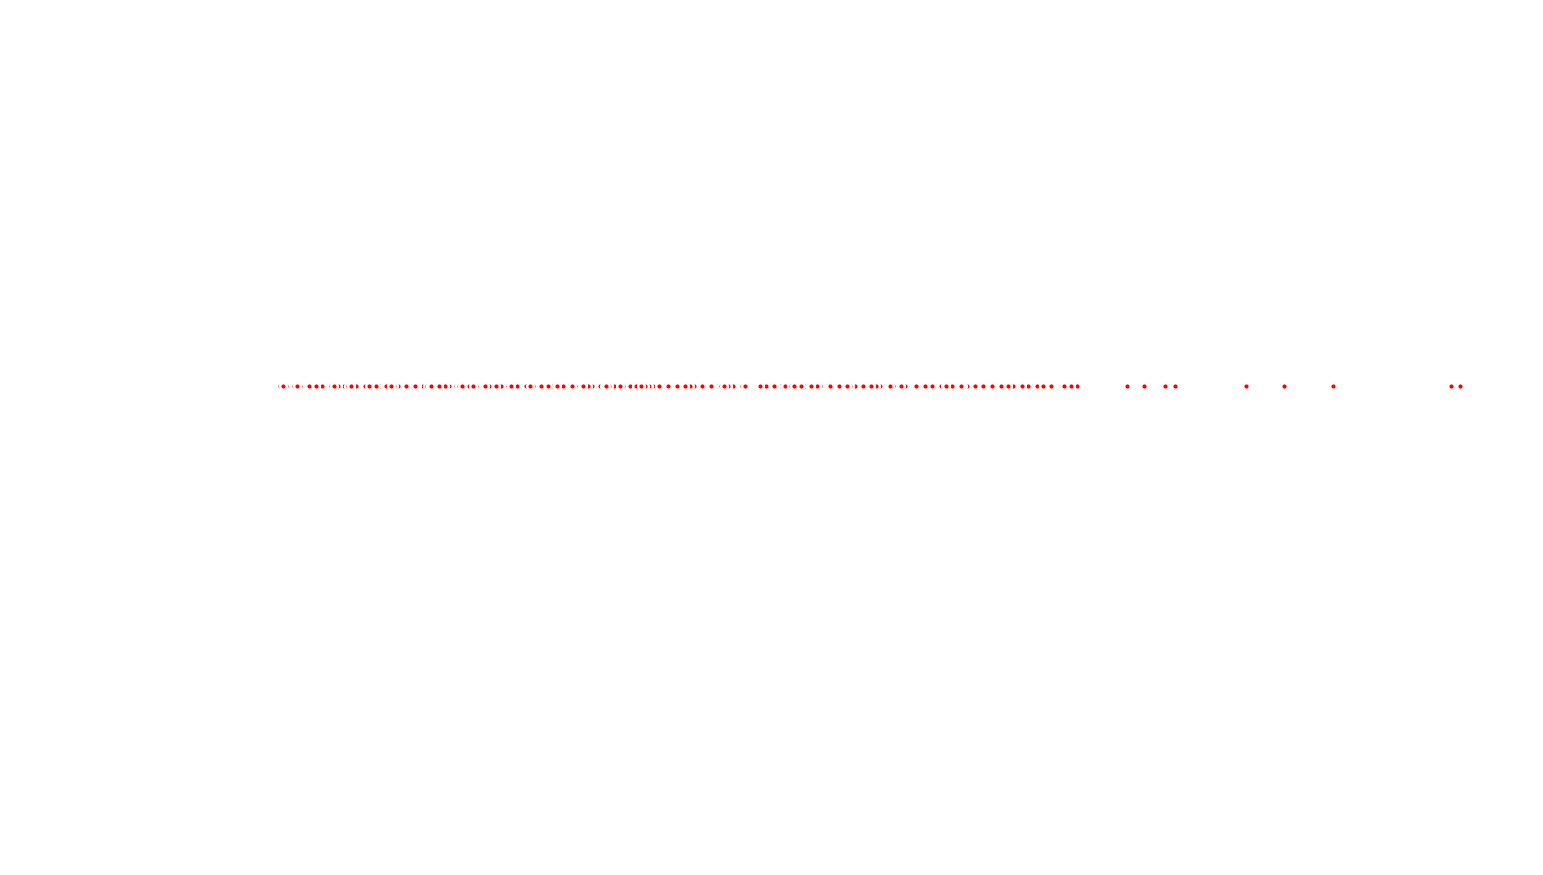

In [26]:
sns.scatterplot(x=churn_df['Income'], y=churn_df['DummyChurn'], color='red')
plt.show();

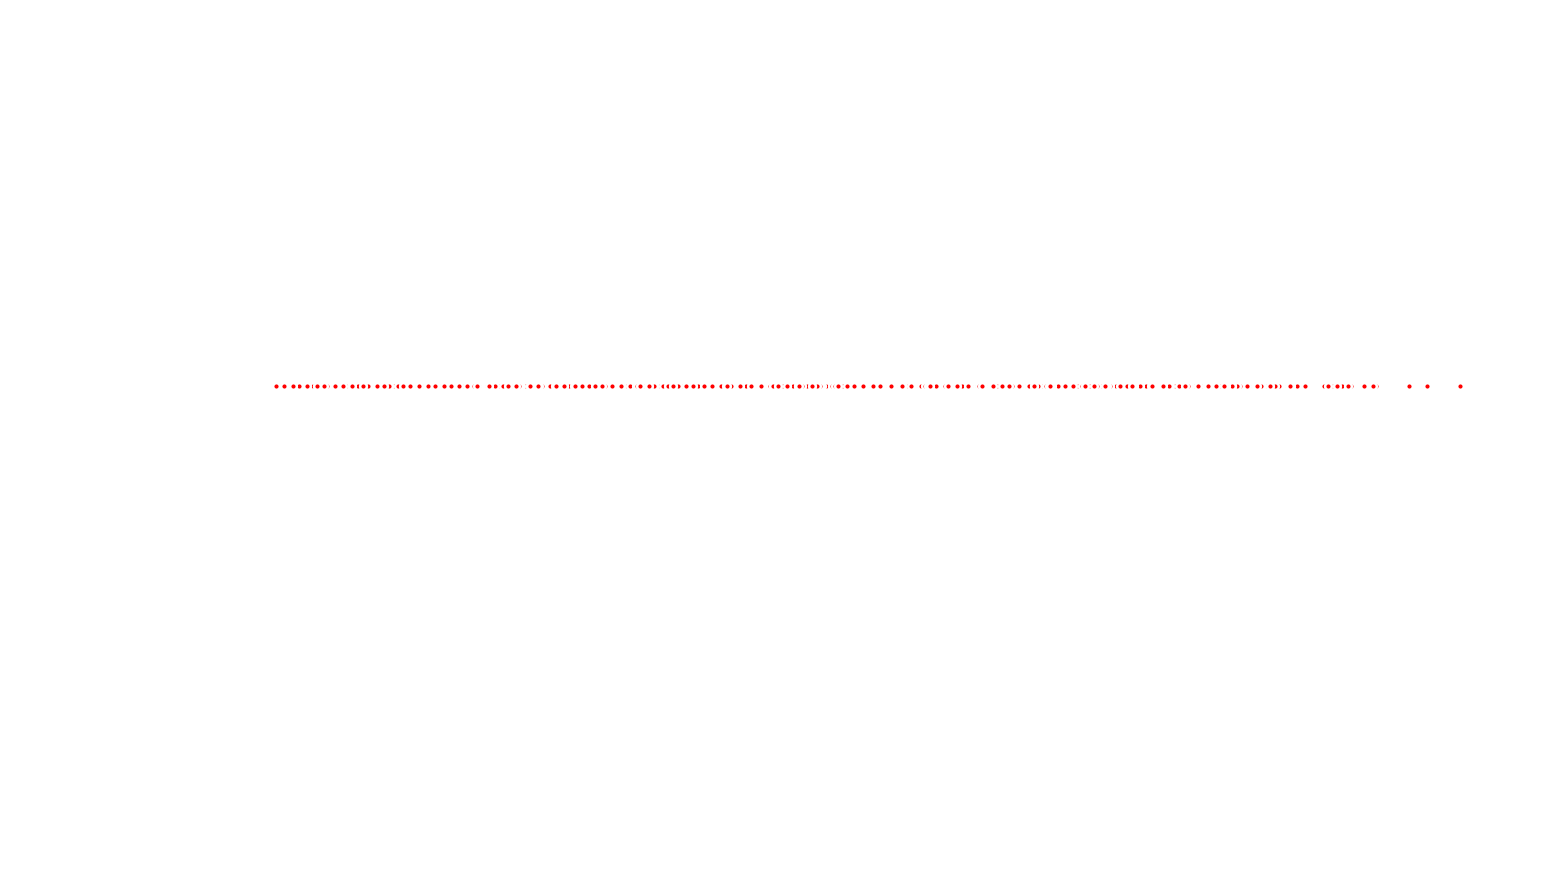

In [27]:
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['DummyChurn'], color='red')
plt.show();

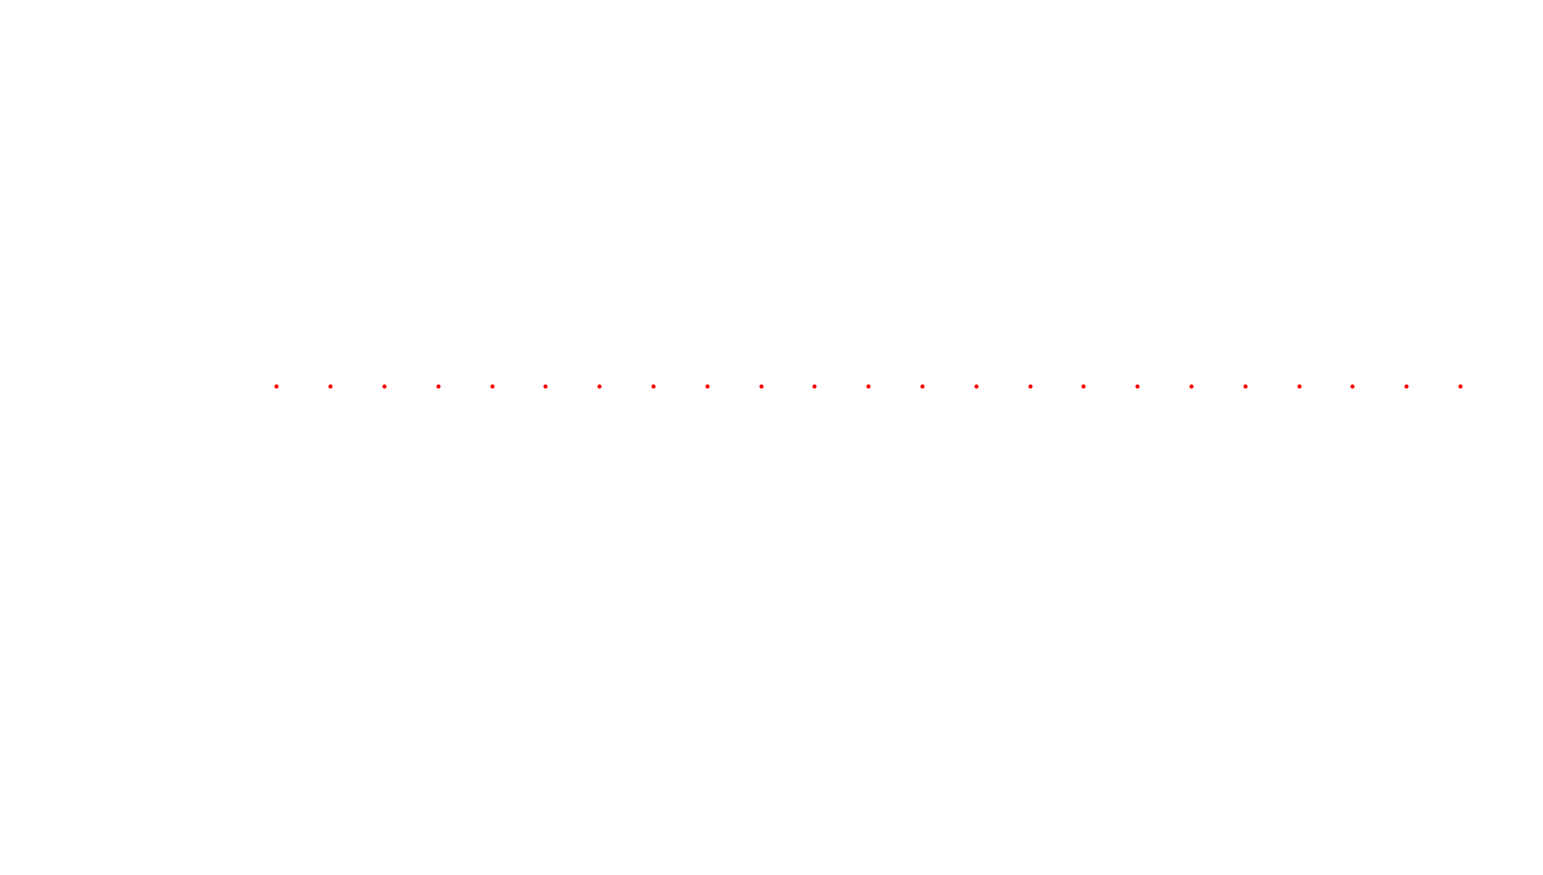

In [28]:
sns.scatterplot(x=churn_df['Email'], y=churn_df['DummyChurn'], color='red')
plt.show();

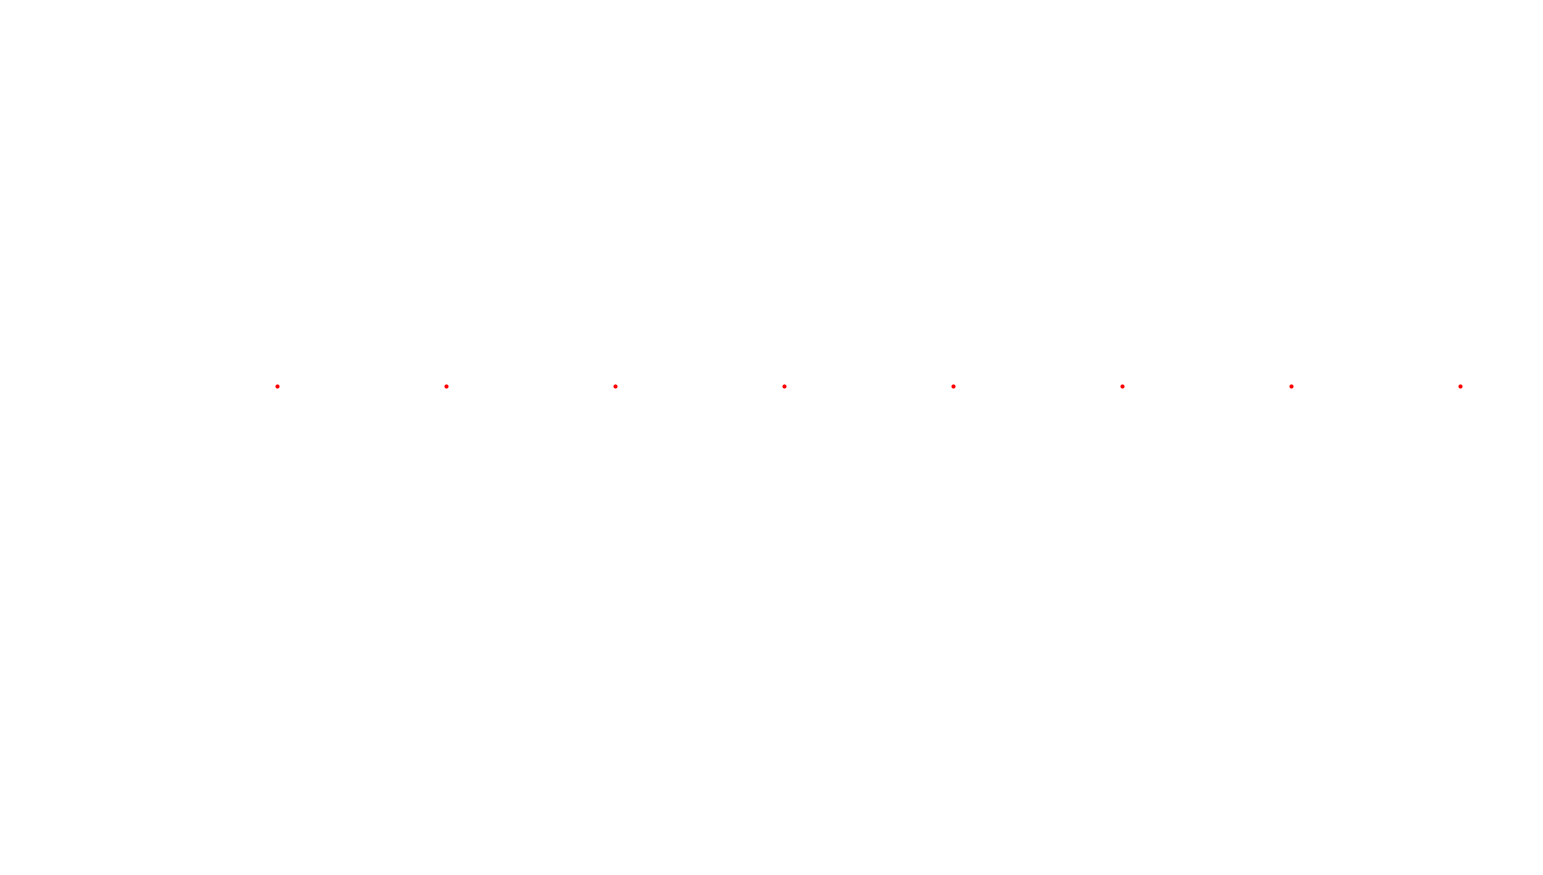

In [29]:
sns.scatterplot(x=churn_df['Contacts'], y=churn_df['DummyChurn'], color='red')
plt.show();

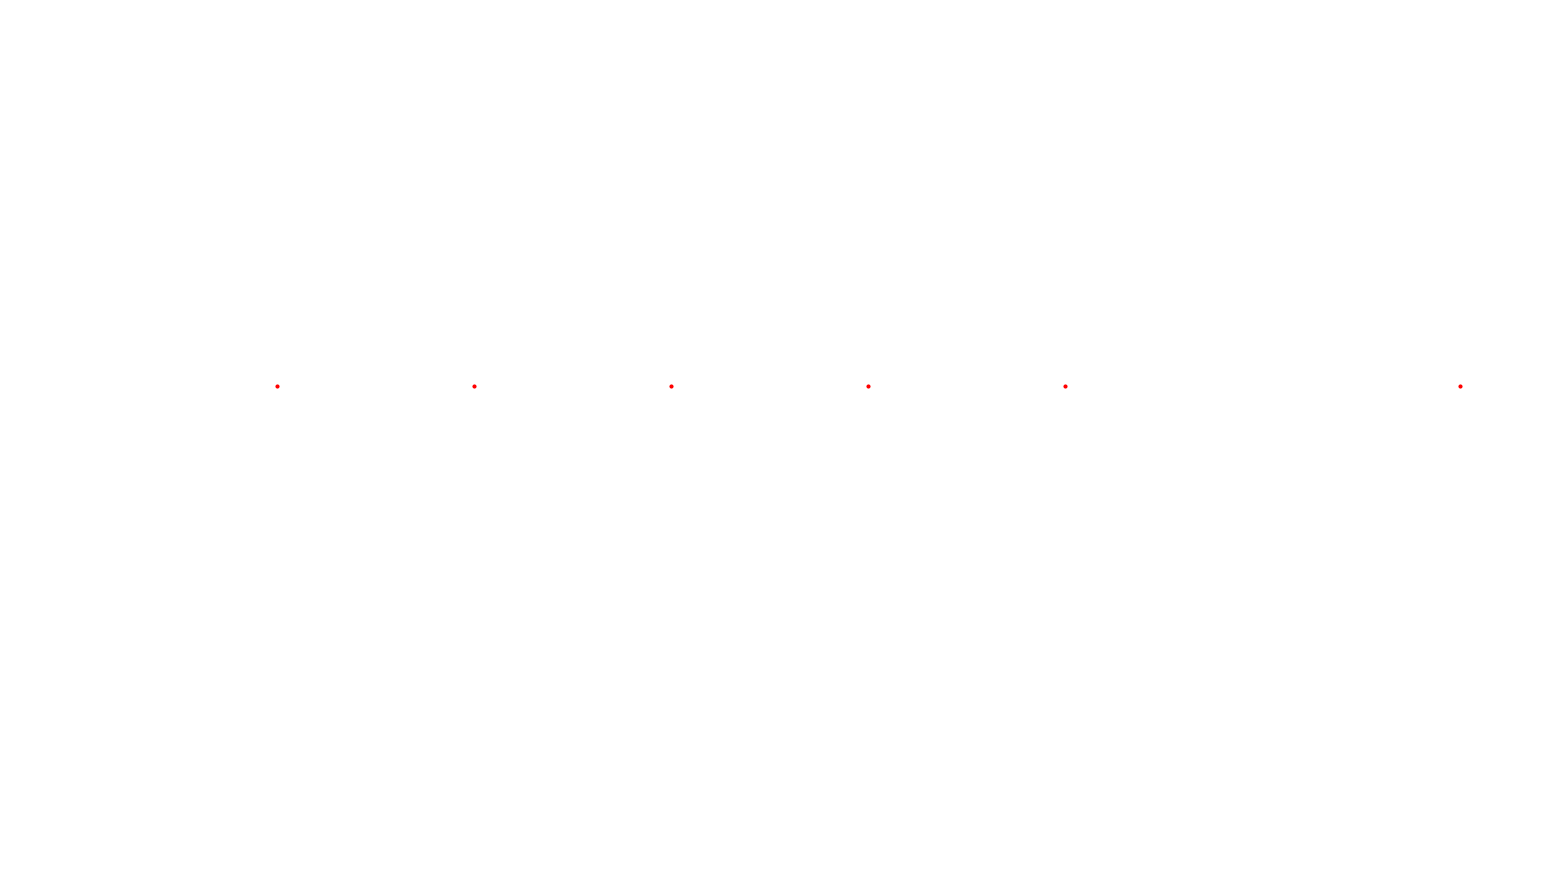

In [30]:
sns.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['DummyChurn'], color='red')
plt.show();

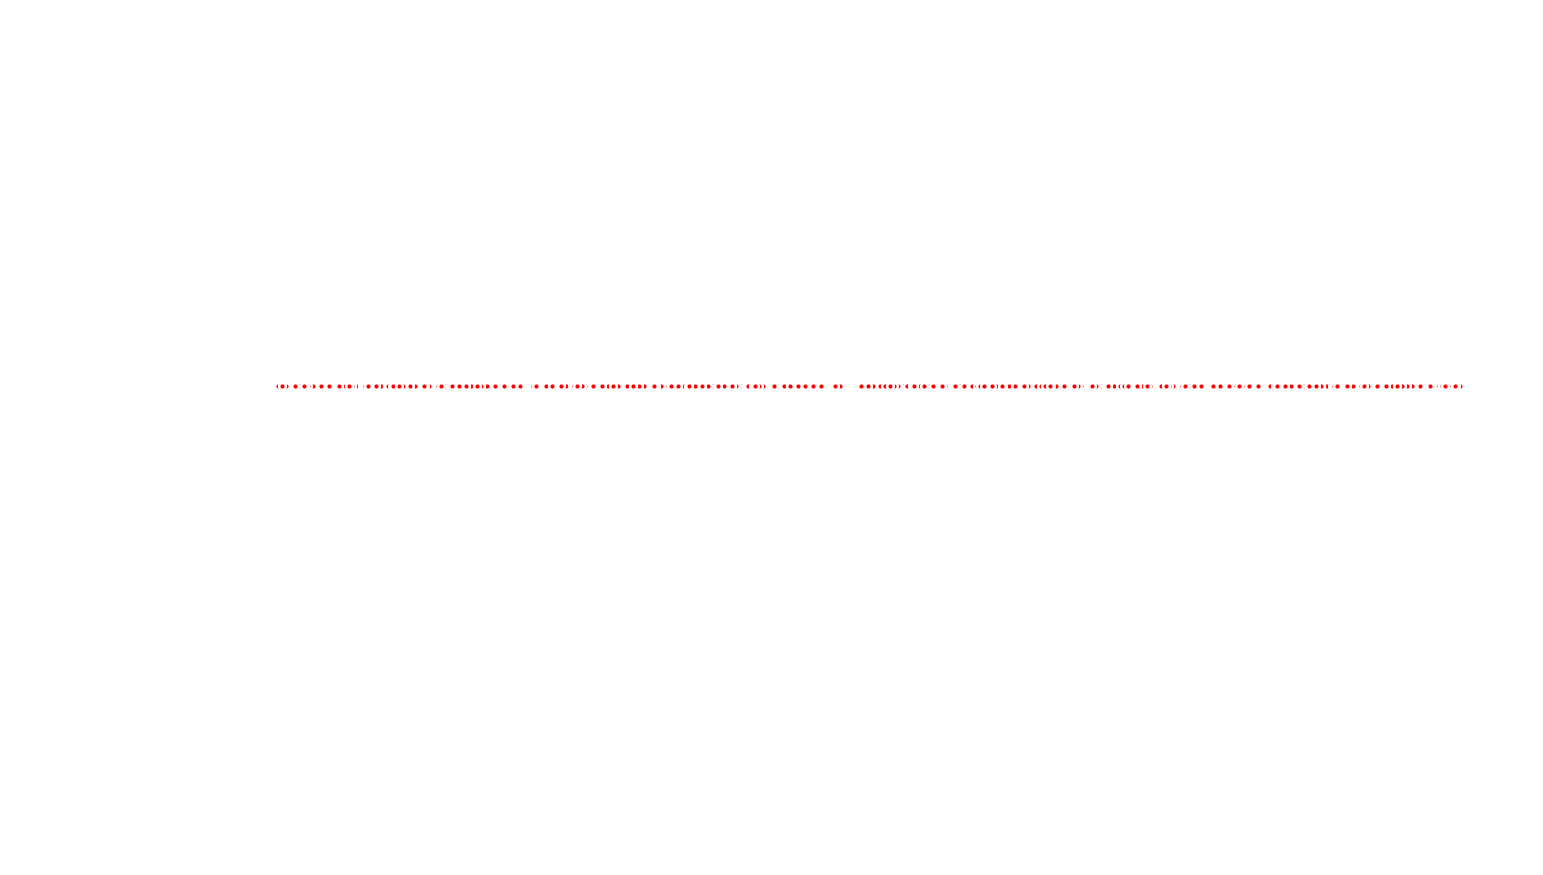

In [31]:
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['DummyChurn'], color='red')
plt.show();

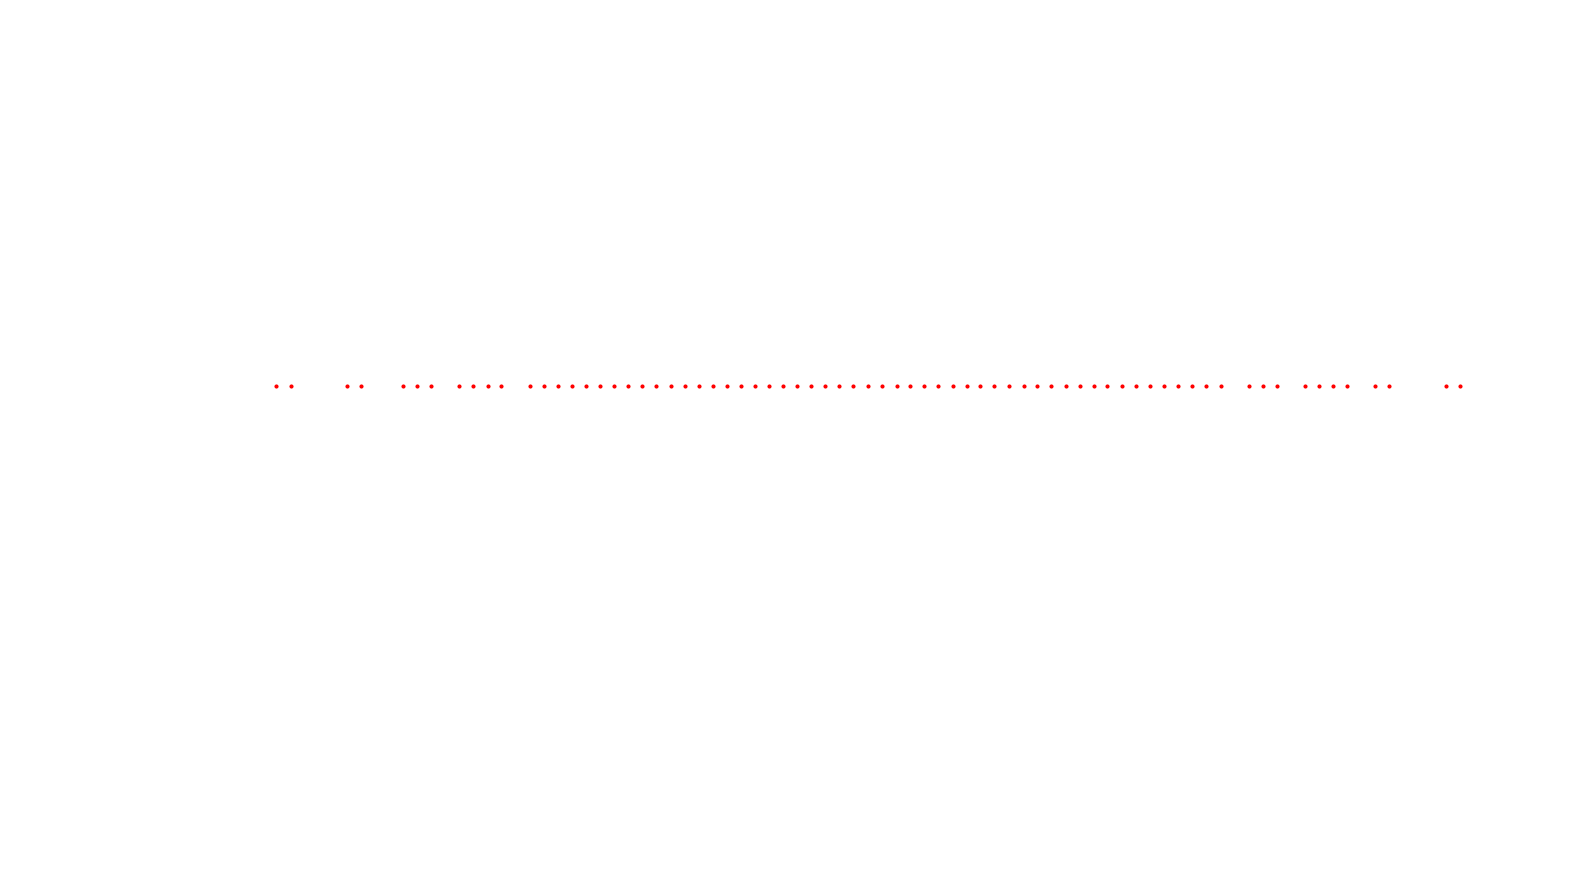

In [32]:
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['DummyChurn'], color='red')
plt.show();

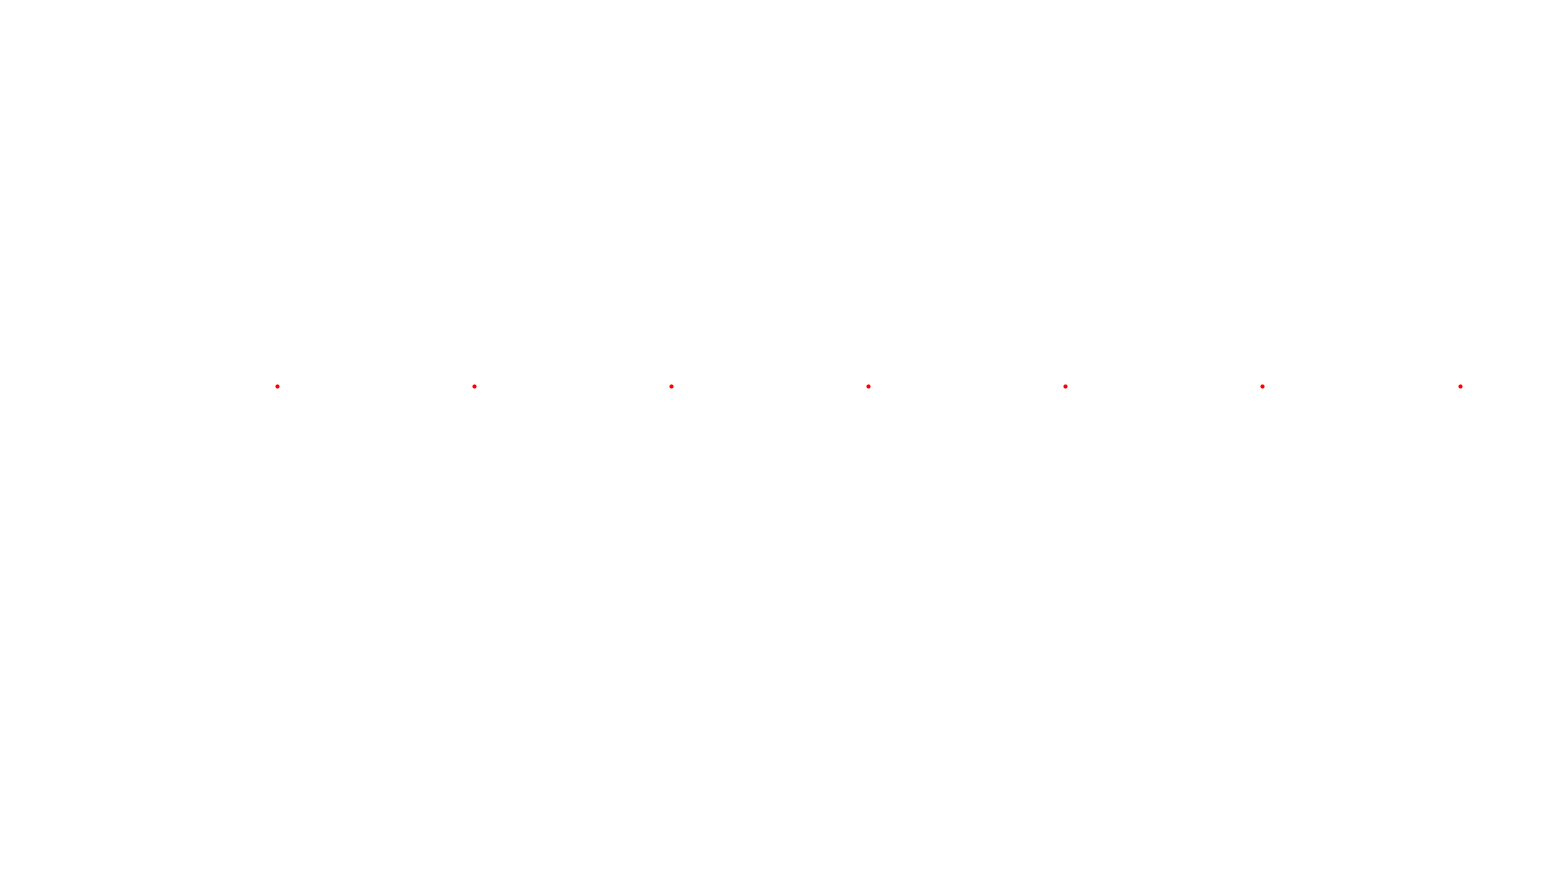

In [33]:
sns.scatterplot(x=churn_df['TimelyResponse'], y=churn_df['DummyChurn'], color='red')
plt.show();

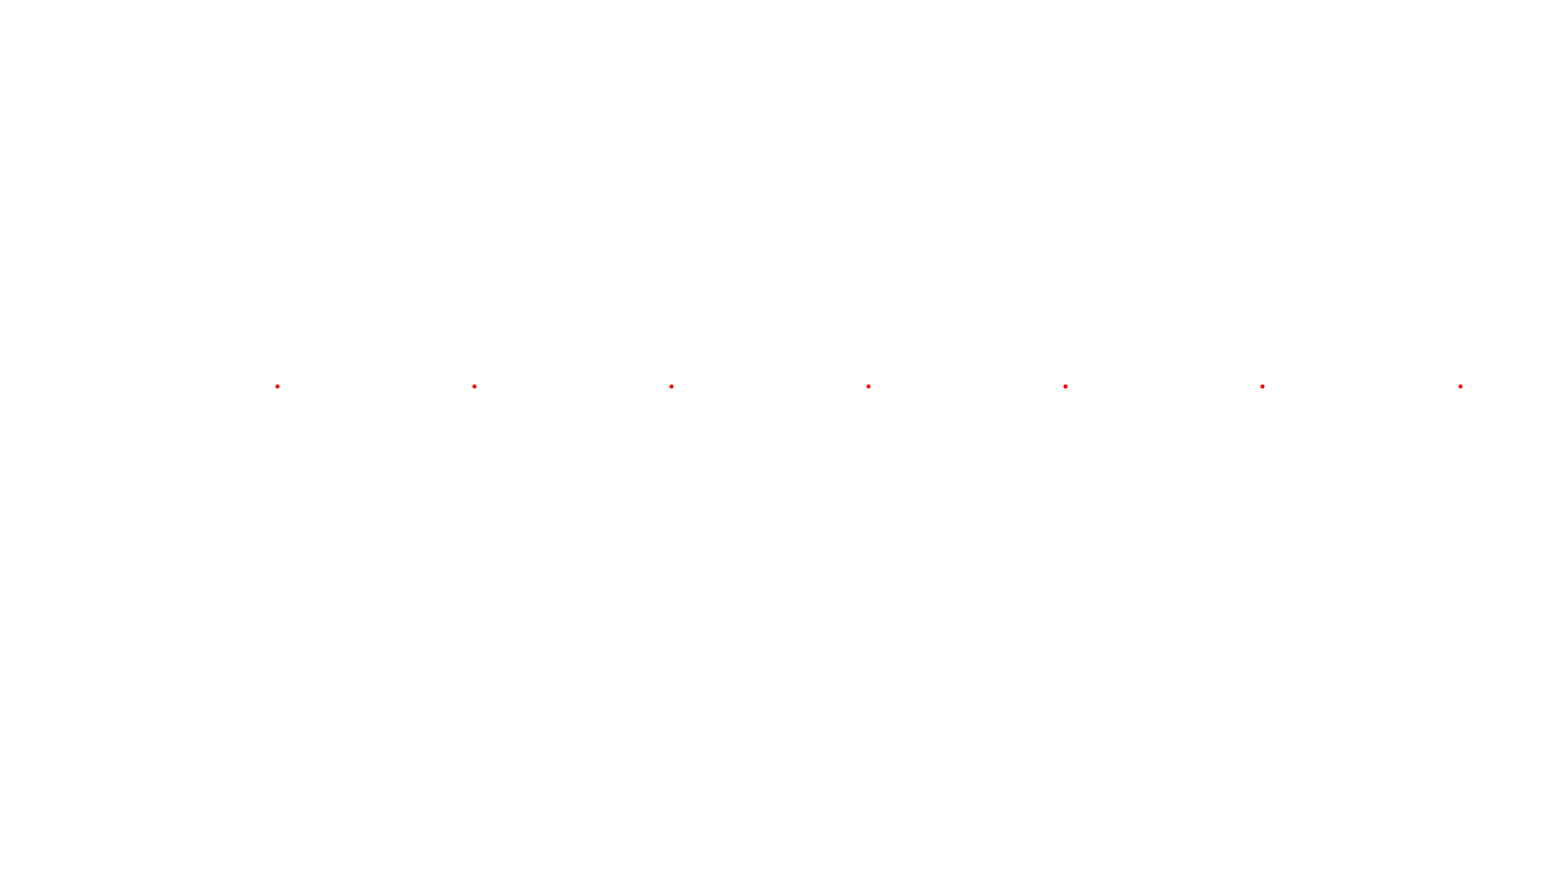

In [34]:
sns.scatterplot(x=churn_df['Fixes'], y=churn_df['DummyChurn'], color='red')
plt.show();

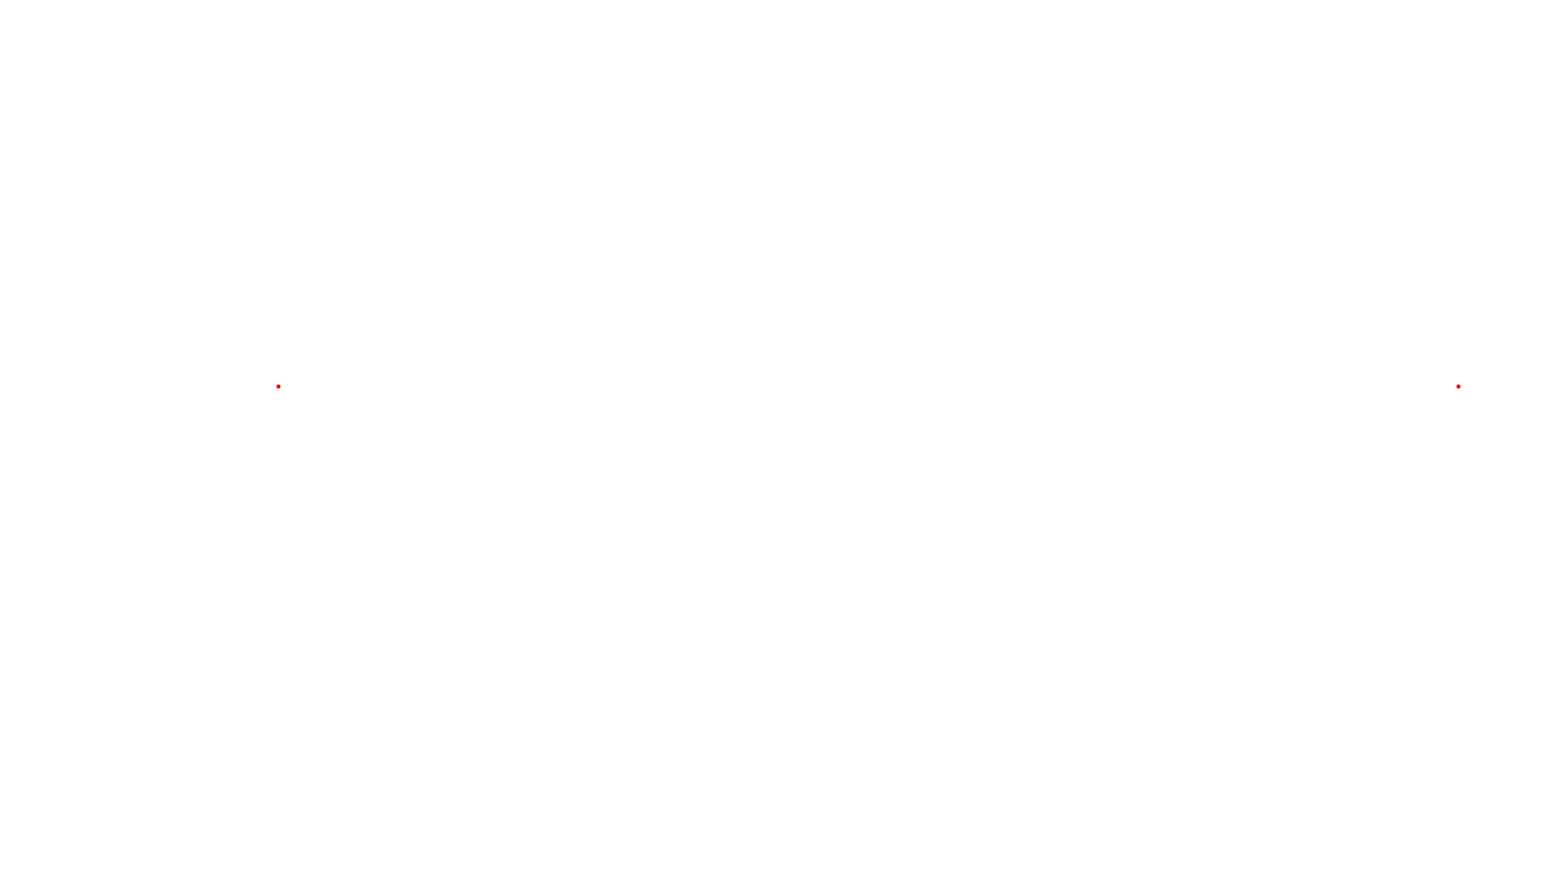

In [35]:
sns.scatterplot(x=churn_df['DummyTechie'], y=churn_df['DummyChurn'], color='red')
plt.show();

### <span style="color:green"><b>C5. Prepared Dataset</b>:</span>
Provide a copy of the prepared data set.

In [38]:
# Extract Clean dataset
churn_df.to_csv('data/churn_prepared_log.csv')

### <span style='color:Gold'><b>Part IV: Model Comparison and Analysis</b></span>

D.  Compare an initial and a reduced logistic regression model by doing the following:

1.  Construct an initial logistic regression model from all predictors that were identified in Part C2.

2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced logistic regression model that includes both categorical and continuous variables.



<span style='color:red'>Note: The output should include a screenshot of each model.</span>

### <span style="color:green"><b>D1. Initial Model</b></span>
Construct an initial logistic regression model from all predictors that were identified in Part C2.

<span style='color:red'>Note: Clearly state regression equation, for example:</span>

<span style='color:red'><b>   "four indpendent vars: y = -0.878 + 0.01 * Age + 0.31 * Female + 0.22 * Education + 0.09 * Income"</b></span>


In [39]:
"""Develop the initial estimated regression equation that could be used to predict the probability of customer churn, given the only continuous variables"""
      
churn_df = pd.read_csv('data/churn_prepared_log.csv')
churn_df['intercept'] = 1
churn_df = pd.get_dummies(churn_df, drop_first=True)

churn_logit_model = sm.Logit(churn_df['DummyChurn'], churn_df[['Children', 'Age', 
                                                               'Income',
                                                               'Outage_sec_perweek', 
                                                               'Email', 'Contacts',
                                                               'Yearly_equip_failure', 
                                                               'Tenure', 'MonthlyCharge',
                                                               'Bandwidth_GB_Year',
                                                               'TimelyResponse', 'Fixes', 
                                                               'Replacements', 'Reliability', 
                                                               'Options', 'Respectfulness', 
                                                               'Courteous', 'Listening', 
                                                               'intercept']]).fit()
print(churn_logit_model.summary())

ValueError: endog must be in the unit interval.

In [ ]:
churn_df_dummies = churn_df.columns
print(churn_df_dummies)

### Now, let's run a model including all encoded categorical dummy variables.

In [ ]:
""""Model including all dummy variables"""
churn_df['intercept'] = 1
lm_bandwidth = sm.OLS(churn_df['Bandwidth_GB_Year'], churn_df[['Children', 'Age', 
                                                               'Income', 'Outage_sec_perweek', 
                                                               'Email', 'Contacts',
                                                               'Yearly_equip_failure', 
                                                               'DummyTechie', 'DummyContract', 
                                                               'DummyPort_modem', 'DummyTablet', 
                                                               'DummyInternetService', 'DummyPhone', 
                                                               'DummyMultiple', 'DummyOnlineSecurity', 
                                                               'DummyOnlineBackup', 'DummyDeviceProtection', 
                                                               'DummyTechSupport', 'DummyStreamingTV', 
                                                               'DummyPaperlessBilling',
                                                               'Tenure', 'MonthlyCharge', 
                                                               'TimelyResponse', 'Fixes', 
                                                               'Replacements', 'Reliability', 
                                                               'Options', 'Respectfulness', 
                                                               'Courteous', 'Listening', 
                                                               'intercept']]).fit()
print(lm_bandwidth.summary())

### Initial Multiple Linear Regression Model
With <b><i>30</i></b> indpendent variables (17 continuous & 13 categorical): 
<br><br>&emsp;<span style="color:gold">y = 104.85 + 30.86 * Children - 3.31 * Age + 0.00 * Income - 0.26 * Outage_sec_perweek - 0.31 * Email + 2.95 * Contacts + 0.67 * Yearly_equip_failure + 0.62 * DummyTechie + 3.93 * DummyContract + 0.47 * DummyPort_modem - 1.98 * DummyTablet - 373.71 * DummyInternetService - 2.15 * DummyPhone - 76.08 * DummyMultiple + 67.49 * DummyOnlineSecurity - 12.66 * DummyOnlineBackup + 24.89 * DummyDeviceProtection - 52.58 * DummyTechSupport + 30.48 * DummyStreamingTV - 2.64 * DummyPaperlessBilling + 82.01 * Tenure + 3.28 * MonthlyCharge - 8.9 * TimelyResponse + 3.47 * Fixes - 0.18 * Replacements - 0.27 * Reliability + 2.72 * Options + 1.72 * Respectfulness - 1.35 * Courteous + 5.78 * Listening</span>

### Based on an R<sup>2</sup> value = 0.989.  So, 99% of the variation is explained by this model.  The condition number is large which might suggest strong multicolinnearity.  Apparently, we do not need all of these variables to explain the variance.  So, let's run a heatmap for bivariate analysis & a principal component analysis in order to reduce variables.

### <span style="color:green"><b>D2. Justification of Model Reduction</b></span>
Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

In [ ]:
# Create dataframe for heatmap bivariate analysis of correlation
churn_bivariate = churn_df[['Bandwidth_GB_Year', 'Children', 'Age', 'Income', 
                            'Outage_sec_perweek', 'Yearly_equip_failure', 'DummyTechie', 'DummyContract', 
                            'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 
                            'DummyPhone', 'DummyMultiple', 'DummyOnlineSecurity', 
                            'DummyOnlineBackup', 'DummyDeviceProtection', 
                            'DummyTechSupport', 'DummyStreamingTV', 
                            'DummyPaperlessBilling','Email', 'Contacts',  
                            'Tenure', 'MonthlyCharge', 'TimelyResponse', 'Fixes', 
                            'Replacements', 'Reliability', 'Options', 'Respectfulness', 
                            'Courteous', 'Listening']]

In [ ]:
# Run Seaborn heatmap
sns.heatmap(churn_bivariate.corr(), annot=False)
plt.show()

### Alrighty, let's try that without some demographic, contacting-customer & options variables, basically purple or darker.

In [ ]:
churn_bivariate = churn_df[['Bandwidth_GB_Year', 'Children',
                            'Tenure', 'TimelyResponse', 'Fixes', 
                            'Replacements', 'Respectfulness', 
                            'Courteous', 'Listening']]

sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

### That looks a lot better.

#### Again, it appears that Tenure is the predictor for most of the variance.  There is clearly a direct linear relationship between customer tenure with the telecom company & the amount of data (in GBs) that is being used.  Let's run a multiple linear regression model on those variables with 0.50 or above & children because of its high coefficient (30.86) on the original OLS model. I also add children intuitively because children always add cost & using the p-value for children is 0.000, & therefore statistically significant.  
### So, the reduced regression equation will include the continuous variable of tenure & the categorical of children as well ad the the ordinal categorical independent variables of fixes & replacements. 

### <span style="color:green"><b>D3. Reduced Multiple Regression Model</b></span>

In [ ]:
# Run reduced OLS multiple regression
churn_df['intercept'] = 1
lm_bandwidth_reduced = sm.OLS(churn_df['Bandwidth_GB_Year'], churn_df[['Children', 'Tenure', 'Fixes', 'Replacements', 'intercept']]).fit()
print(lm_bandwidth_reduced.summary())

### Well, there it is.  Removing all those other predictor variables & our model still explains 98% of the variance.

### Reduced Multiple Linear Regression Model
With <b>4</b> indpendent variables: 
<br><br>&emsp;<span style="color:gold">y = 497.78 + 31.18 * Children + 81.94 * Tenure + 1.07 * Fixes - 3.66 * Replacements</span>

### <span style='color:Gold'><b>Part IV: E</b></span>
E.  Analyze the data set using your reduced logistic regression model by doing the following:

1.  Explain your data analysis process by comparing the initial and reduced logistic regression models, including the following elements:
<ul>
    <li>
    the logic of the variable selection technique
    </li>
    <li>
    the model evaluation metric
    </li>
    <li>
    a residual plot
    </li>
</ul>
2.  Provide the output and any calculations of the analysis you performed, including the model’s residual error.



<span style='color:red'>Note: The output should include the predictions from the refined model you used to perform the analysis. </span>



3.  Provide the code used to support the implementation of the logistic regression models.



### <span style="color:green"><b>E1. Model Comparison</b></span>
1. Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:
<ul>
    <li>
    the logic of the variable selection technique
    </li>
    <li>
    the model evaluation metric
    </li>
</ul>
2. Provide the output and any calculations of the analysis you performed, including a <span style='color:red'>confusion matrix</span>.

<span style='color:red'>Note: Verbatim from fasttrack description of analysis of Titanic dataset, 
<br>"Since male is the dummy variable, being male reduces the log odds by 2.75 while a unit increase in age reduces log odds by 0.037." </span>

### Confusion Matrix

### <span style="color:green"><b>E2. Output & Calculations</b></span>
Calculations & code output above.

### <span style="color:green"><b>E3. Code</b></span>
All code for analysis include above.

### <span style="color:green"><b>F1. Results</b></span>
 Discuss the results of your data analysis, including the following elements:
<ul>
    <li>
    The final multiple regression equation with <b>4</b> indpendent variables: 
<br>&emsp;<span style="color:gold">y = 497.78 + 31.18 * Children + 81.94 * Tenure + 1.07 * Fixes - 3.66 * Replacements</span><br>
    </li>
    <li>
    The coefficients suggest that for every 1 unit of:
        <ul>
            <li>Children - Bandwidth_GB_Year will increase 31.18 units</li>
            <li>Tenure - Bandwidth_GB_Year will increase 81.94 units</li>
            <li>Fixes - Bandwidth_GB_Year will increase 1.07 units</li>
            <li>Replacements -  - Bandwidth_GB_Year will decrease 3.66 units</li>
        </ul>
    </li>
    <li>
    P-values for Children & Tenure are statistically significant at 0.000, while p-values for Fixes & Replacements are not statistically significant at 0.73 & 0.25, respectively.
    </li>
    <li>
    The limitations of this analysis are that the data set is a bit small & that perhaps more years of data need to be collected.  Also, correlation is not causation so we cannot tell whether longer tenure with the company causes higher yearly bandwith usage or vice versa or if there is another variable that causes both.  More investigation is required.
    </li>
</ul>

### <span style="color:green"><b>F2. Recommendations</b></span>
For the purposes of this analysis & to make the time spent on the analysis acceptable & provide actionable information:  
with such a direct linear relationship between bandwidth used yearly & tenure with the telecom company it makes sense to suggest the company do everything within marketing & customer service capability to retain the customers gained as the longer they stay with the company the more bandwidth they tend to use.  This would include making sure that fixes to customer problems are prompt & that the equipment provided is high quality to avoid fewer replacements of equipment. 

### <span style="color:green"><b>G. Video</b></span>
<span style="color:red">https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3ea5b33b-48e8-4dd5-b313-ad66000cb01d</span>

### <span style="color:green">H. Sources for Third-Party Code</span>

Kaggle. (2018, May 01). Bivariate plotting with pandas. Kaggle. https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas#

<br> Sree. &ensp; (2020, October 26). &ensp; <i>Predict Customer Churn in Python.</i> &ensp; Towards Data Science. https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

<br> Wikipedia. (2021, May 31). Bivariate Analysis. https://en.wikipedia.org/wiki/Bivariate_analysis#:~:text=Bivariate%20analysis%20is%20one%20of,the%20empirical%20relationship%20between%20them.&text=Like%20univariate%20analysis%2C%20bivariate%20analysis%20can%20be%20descriptive%20or%20inferential.

### <span style="color:green">I. Sources</span>

Ahmad, A. K., Jafar, A & Aljoumaa, K. &ensp; (2019, March 20). &ensp; <i>Customer churn prediction in telecom using machine learning in big data platform</i>. &ensp; Journal of Big Data. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0191-6

<br> Altexsoft. &ensp; (2019, March 27). &ensp; <i>Customer Churn Prediction Using Machine Learning: Main Approaches and Models</i>. &ensp; Altexsoft. &ensp; &ensp; https://www.altexsoft.com/blog/business/customer-churn-prediction-for-subscription-businesses-using-machine-learning-main-approaches-and-models/

<br> Bruce, P., Bruce A. & Gedeck P. &ensp; (2020). &ensp; <i>Practical Statistics for Data Scientists</i>. &ensp; O'Reilly.

<br> CBTNuggets. &ensp; (2018, September 20). &ensp; <i>Why Data Scientists Love Python</i>. &ensp; https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python

<br> Freedman, D. Pisani, R. & Purves, R. &ensp; (2018). &ensp; <i>Statistics</i>. &ensp; W. W. Norton & Company, Inc. 

<br> Frohbose, F. &ensp; (2020, November 24). &ensp; <i>Machine Learning Case Study: Telco Customer Churn Prediction</i>.  &ensp; Towards Data Science. &ensp; https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d

<br> Griffiths, D. &ensp; (2009). &ensp; <i>A Brain-Friendly Guide: Head First Statistics</i>. &ensp; O'Reilly.

<br> Grus, J. &ensp; (2015). &ensp; <i>Data Science from Scratch</i>. &ensp; O'Reilly.

<br> Massaron, L. & Boschetti, A. &ensp; (2016). &ensp; <i>Regression Analysis with Python</i>. &ensp; Packt Publishing.

<br> McKinney, W. &ensp; (2018). &ensp; <i>Python for Data Analysis</i>. O'Reilly.

<br> Rossant, C. (2018). &ensp; <i>IPython Interactive Computing & Visualization Cookbook, 2nd Edition</i>. &ensp; Packt Publishing.

<br> Rossant, C. (2015). &ensp; <i>Learning IPython Interactive Computing & Visualization, 2nd Edition</i>. &ensp; Packt Publishing.

<br> VanderPlas, J. &ensp; (2017). &ensp; <i>Python Data Science Handbook</i>. &ensp; O'Reilly.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('D208_Performance_Assessment_NBM2_Task_1.ipynb')